In [1]:
# Required libraries: pandas , folium , numpy , matplotlib , scikit-learn , scipy , branca , h5py , tables

To be able to re-run this notebook, the necessary libraries can be installed with the commented line above.

## Importing The Necessary Libraries

In [2]:
import pandas as pd
import folium
import numpy as np
import matplotlib.pyplot as plt
import requests

#### Reading the data provided from the governement's website

# Step 1: READING AND CLEANING THE DATA

In [3]:
cars_df = pd.read_csv("daily_cars.csv" , encoding="ISO-8859-1",sep=";")

In [4]:
cars_df.columns = ["date","sensor_name","lon","lat","num_cars"]

#### Setting the column names (They are originally in Turkish)

In [5]:
cars_df.head()

,date,sensor_name,lon,lat,num_cars
0,1.01.2020,ciragan Cad.,"29,016617","41,044845",86521
1,1.01.2020,Kco cekmekoy Kavsagi,"29,19354","41,051371",9451
2,1.01.2020,Gunesli 2 Basin Ekspres yolu,"28,811125","41,024099",53991
3,1.01.2020,Buyukdere 1.Levent,"29,015483","41,073533",102531
4,1.01.2020,Cevizlibag,"28,914282","41,018157",129090


Dataset:
This dataset contains the number of cars a particular sensor has detected in a day <p>
Date column contains days <p>
Sensor name contains the name of the place that a particular sensor is located at <p>
Lon stands for longitude <p>
Lat stands for lattitude <p>
Num_cars contains the number of cars

In [6]:
cars_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47398 entries, 0 to 47397
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   date         47398 non-null  object
 1   sensor_name  47398 non-null  object
 2   lon          47101 non-null  object
 3   lat          47101 non-null  object
 4   num_cars     47398 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 1.8+ MB


1- From that output , we see that there are missing locations and without that info , those rows are useless. We could fill those rows by searching for the sensor's name on the google and looking for coordinates but there's no need for that <p>

2- lat and lon columns are objects because in turkey , we use ',' as the floating point indicator. We need to replace ',' s with '.' s to convert that column to floats

In [7]:
cars_df.dropna(inplace=True)

In [8]:
cars_df.lat = cars_df.lat.apply(lambda x: str(x).replace(",","."))

In [9]:
cars_df.lon = cars_df.lon.apply(lambda x: str(x).replace(",","."))

In [10]:
cars_df.lat = cars_df.lat.astype("float64")
cars_df.lon = cars_df.lon.astype("float64")

In [11]:
cars_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47101 entries, 0 to 47397
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         47101 non-null  object 
 1   sensor_name  47101 non-null  object 
 2   lon          47101 non-null  float64
 3   lat          47101 non-null  float64
 4   num_cars     47101 non-null  int64  
dtypes: float64(2), int64(1), object(2)
memory usage: 2.2+ MB


Now , our 'lat' and 'lon' columns are in the form we want them to be. We need to convert the date column to get the day out of it and after that , we can get the average number of cars passing per day.

In [12]:
cars_df["date"] = pd.to_datetime(cars_df["date"])

In [13]:
cars_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47101 entries, 0 to 47397
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         47101 non-null  datetime64[ns]
 1   sensor_name  47101 non-null  object        
 2   lon          47101 non-null  float64       
 3   lat          47101 non-null  float64       
 4   num_cars     47101 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(1), object(1)
memory usage: 2.2+ MB


Now we can extract the day and the month 

In [14]:
cars_df["day"] = cars_df.date.apply(lambda x: x.day)

In [15]:
cars_df["month"] = cars_df.date.apply(lambda x: x.month)

We don't need the date column anymore so let's drop it to save some memory space

In [16]:
cars_df.drop("date" , axis=1 , inplace=True)

In [17]:
cars_df.head()

,sensor_name,lon,lat,num_cars,day,month
0,ciragan Cad.,29.016617,41.044845,86521,1,1
1,Kco cekmekoy Kavsagi,29.193540,41.051371,9451,1,1
2,Gunesli 2 Basin Ekspres yolu,28.811125,41.024099,53991,1,1
3,Buyukdere 1.Levent,29.015483,41.073533,102531,1,1
4,Cevizlibag,28.914282,41.018157,129090,1,1


#### Now , we can group our dataset by sensor names to get the average number of cars , It's ok to get the average lat and lon because every row contains the same value for them.

In [18]:
gby = cars_df.groupby("sensor_name").mean()[["num_cars","lon","lat"]]

In [19]:
gby.head()

,num_cars,lon,lat
sensor_name,,,
Alemdag,11515.674797,29.228200,41.044900
15 Temmuz sehitler Koprusu Anadolu,124149.208054,29.043900,41.035517
15 Temmuz sehitler Koprusu Yildiz Katilimi,104345.873333,29.018432,41.057702
Akom onu,88500.404110,28.961073,41.090599
Alemdag Kavsagi,28806.201550,29.270000,41.028900


# STEP 2: BASIC EXAMINATION OF DATA

Let's visualize our data first to have a little insight of what we are facing from the beginning

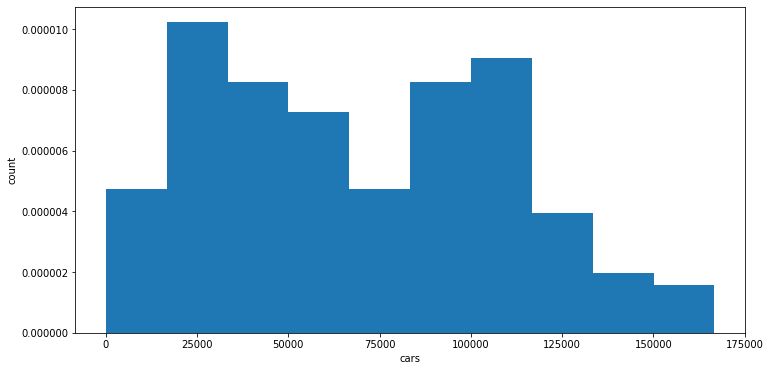

In [20]:
plt.figure(figsize=(12,6))
plt.hist(gby["num_cars"],density=True)
plt.xlabel("cars");
plt.ylabel("count");

From the plot above, we can see that most of the censors recorded 25000 to 75000 cars per day, but because there is no normal distrubution, we also have a density between 75000 cars and 125000 cars per day. Even thought those are huge numbers too, our main tagret in this project is the points that have recorded more than 100 000 cars per day. This project will mainly examine those areas and try to figure out what are the main reasons behing this huge numbers.

Note: We haven't cleaned the outliers like the censors on the sea. But because the visualization above is generalizing, its ok to not have those outliers cleaned yet.

# STEP 3: VISUALIZATION ON A MAP

Now, we will try to use the coordinates provided in the file to plot our censors on a map to be able to see the distrubution of those censors around the city.

In [21]:
gmap = folium.Map(location = (gby.lat[0],gby.lat[1]))

In [22]:
map_osm = folium.Map(location=[gby["lat"][0],gby["lon"][0]], zoom_start=10)
gby.apply(lambda row:folium.CircleMarker(location=[row["lat"], row["lon"]], popup = row["num_cars"] ,
                                              radius=10)
                                             .add_to(map_osm), axis=1)
map_osm

It's almost perfect. We need to get rid of the sensor on the sea because we can't get any information about them from Foursquare but its not necessary now, we will do it later.

Now , we're going to divide our number of cars data to clusters so we can visualize them easily ( I coldn't find any way to visualize contunious values with folium)

# STEP 4: NORMALIZING OUR DATA AND TURNING THE CONTINIOUS NUM CARS VARIABLE TO DISCRIMINATED DENSITY VALUE.

In [23]:
import branca

import branca.colormap as cmap

colormap = cmap.LinearColormap(colors=['green',"yellow",'red'],vmin=0,vmax=175000)

we created a colormap to visualize the number of cars in our plot

Note: There was a normalization step where I added dummy variables for representing the density of the area but later, I decided to use the number of cars on its own. That's why there is almost no normalization under that topic.

In [24]:
gby.head()

,num_cars,lon,lat
sensor_name,,,
Alemdag,11515.674797,29.228200,41.044900
15 Temmuz sehitler Koprusu Anadolu,124149.208054,29.043900,41.035517
15 Temmuz sehitler Koprusu Yildiz Katilimi,104345.873333,29.018432,41.057702
Akom onu,88500.404110,28.961073,41.090599
Alemdag Kavsagi,28806.201550,29.270000,41.028900


Perfect , we now have a density column that describes amount traffic. <p>
Now , we need to create a dictionary that contains a color for every density value we have

In [25]:
map_osm = folium.Map(location=[gby["lat"][0],gby["lon"][0]], zoom_start=10)
gby.apply(lambda row:folium.CircleMarker(location=[row["lat"], row["lon"]], popup = row.name , color = colormap(row.num_cars) ,  fill_color =colormap(row.num_cars),
                                              radius=10)
                                             .add_to(map_osm), axis=1)
map_osm

Looks great , now we can get some data from foursquare to see the relationship between traffic and venues

# STEP 5: GETTING THE VENUE INFORMATION FROM FOURSQUARE API

The credentials has to be entered below to get the data from the foursquare api again.

In [26]:
client_id = None
client_secret =  None
version = None

The code below collects the data from the foursquare api. You can convert it to a python cell and run it.




top100 = pd.DataFrame()
for row in gby.iterrows():
    cx = []
    url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&radius={}&limit={}'.format(client_id, client_secret, row[1].lat , row[1].lon , version , 500,100)
    responses = requests.get(url).json()["response"]["venues"][0:]
    for response in responses:
        try:
            cx.append(response["categories"][0]["name"])
        except:
            cx.append(np.nan)
    while len(cx) < 100:
        cx.append(np.nan)
    top100[row[0]] = [i for i in cx]


This process takes a while because the code above is not so efficient at all. Because of my connection speed it takes around 3-5 minutes.<br> I will try to improve it further later.

Saving the data gathered from the foursquare in case our daily API call limit ends.


# the code below saves the data to a h5 file.

h5file = "top100.h5"
top100.to_hdf(h5file,"/data/top100")

In [27]:
top100 = pd.read_hdf('top100.h5',"/data/top100")

Perfect. Now we have the first 100 venue types we get from the foursquare api around those censors. <br>
Now we can get the most frequent venues around those censors by easily using the mode function

# STEP 6: GETTING THE MOST COMMON VENUE TYPE FROM THE DATA EXTRACTED

In [28]:
most_freq = top100.mode()

In [29]:
most_freq.head()

,Alemdag,15 Temmuz sehitler Koprusu Anadolu,15 Temmuz sehitler Koprusu Yildiz Katilimi,Akom onu,Alemdag Kavsagi,Alibeykoy TEM Katilimi,Altunizade,Altunizade umraniye Katilimi,Anadolu Feneri,Anadolu Feneri ust Gecit,...,umraniye Kavsagi,umraniye Kucuksu,umraniye Otopazari,uskudar Sahil Yolu,Ýhsaniye Kavsagi,Ýkitelli Basin Ekspres yolu,Ýshakli,Ýstac Kati Atik Tesisi,Ýstanbul Havalimani cikis,Ýstoc
0,Factory,Coworking Space,Office,Residential Building (Apartment / Condo),College Residence Hall,Residential Building (Apartment / Condo),Office,Office,Farm,Farm,...,Shopping Mall,Office,Residential Building (Apartment / Condo),Office,Factory,Factory,Farm,Coworking Space,Airport Service,Factory
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Factory,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


It's done. We will get rid of those null values and transpose our data frame now.

In [30]:
most_freq = most_freq.T

In [31]:
most_freq = pd.DataFrame(most_freq[0])

In [32]:
most_freq.columns = ["most_freq"]

In [33]:
most_freq

,most_freq
Alemdag,Factory
15 Temmuz sehitler Koprusu Anadolu,Coworking Space
15 Temmuz sehitler Koprusu Yildiz Katilimi,Office
Akom onu,Residential Building (Apartment / Condo)
Alemdag Kavsagi,College Residence Hall
...,...
Ýkitelli Basin Ekspres yolu,Factory
Ýshakli,Farm
Ýstac Kati Atik Tesisi,Coworking Space
Ýstanbul Havalimani cikis,Airport Service


Perfect. Now we can merge our two datasets to one

# STEP 7: MERGING THE TWO DATAFRAMES INTO ONE FINAL DATAFRAME

In [34]:
final_df = pd.merge(gby , most_freq , left_on = gby.index , right_on = most_freq.index)

In [35]:
final_df.head()

,key_0,num_cars,lon,lat,most_freq
0,Alemdag,11515.674797,29.228200,41.044900,Factory
1,15 Temmuz sehitler Koprusu Anadolu,124149.208054,29.043900,41.035517,Coworking Space
2,15 Temmuz sehitler Koprusu Yildiz Katilimi,104345.873333,29.018432,41.057702,Office
3,Akom onu,88500.404110,28.961073,41.090599,Residential Building (Apartment / Condo)
4,Alemdag Kavsagi,28806.201550,29.270000,41.028900,College Residence Hall


In [36]:
final_df.columns = ["sensor_name","num_cars","lon","lat","most_freq"]

Now , lets create a map that popups the most common type of venue around when user clicks

In [37]:
map_osm = folium.Map(location=[gby["lat"][0],gby["lon"][0]], zoom_start=10)
final_df.apply(lambda row:folium.CircleMarker(location=[row["lat"], row["lon"]], popup = row["most_freq"] , color = colormap(row.num_cars) ,  fill_color = colormap(row.num_cars),
                                              radius=10)
                                             .add_to(map_osm), axis=1)
map_osm

Perfect. Now , lets cluster our sensors into central places

# STEP 8: CLUSTERING THE CENSORS TO TREAT THEM AS AREAS 

In [38]:
lat_lons = final_df[["lat","lon"]]

In [39]:
lat_lons

,lat,lon
0,41.044900,29.228200
1,41.035517,29.043900
2,41.057702,29.018432
3,41.090599,28.961073
4,41.028900,29.270000
...,...,...
300,41.056482,28.810554
301,41.130788,29.286221
302,41.203025,28.856191
303,41.246301,28.737081


In [40]:
from sklearn.cluster import KMeans

In [41]:
model = KMeans(n_clusters=8)

8 clusters would be ok.

In [42]:
model.fit(lat_lons)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=8, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [43]:
model.predict(lat_lons)

array([5, 2, 3, 3, 7, 3, 2, 2, 5, 5, 3, 0, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1,
       1, 2, 1, 1, 1, 1, 1, 1, 1, 3, 1, 3, 4, 0, 6, 4, 3, 3, 3, 3, 3, 3,
       2, 2, 2, 4, 1, 2, 2, 1, 3, 1, 2, 7, 7, 3, 3, 7, 7, 2, 2, 1, 1, 2,
       2, 3, 1, 3, 7, 7, 1, 1, 4, 3, 1, 4, 7, 2, 2, 3, 2, 1, 1, 2, 4, 4,
       3, 5, 0, 3, 3, 7, 2, 1, 4, 3, 3, 6, 6, 2, 6, 6, 6, 0, 1, 1, 1, 3,
       4, 4, 3, 3, 1, 1, 1, 1, 1, 5, 5, 2, 3, 7, 7, 7, 7, 7, 7, 5, 2, 2,
       5, 2, 3, 3, 3, 6, 2, 6, 0, 2, 6, 2, 2, 2, 3, 0, 1, 3, 2, 1, 3, 3,
       3, 3, 1, 3, 4, 2, 2, 2, 5, 3, 1, 1, 1, 1, 6, 6, 3, 3, 2, 3, 1, 1,
       7, 7, 6, 3, 0, 5, 5, 5, 5, 5, 2, 0, 7, 1, 3, 3, 3, 3, 3, 3, 3, 5,
       7, 1, 3, 2, 2, 7, 2, 4, 1, 4, 4, 4, 4, 2, 4, 2, 1, 1, 3, 3, 1, 3,
       3, 3, 3, 3, 7, 7, 2, 2, 2, 7, 3, 1, 1, 1, 1, 1, 7, 7, 7, 7, 4, 7,
       7, 7, 7, 1, 1, 4, 2, 2, 2, 1, 4, 4, 3, 5, 3, 1, 7, 3, 3, 0, 0, 0,
       3, 1, 6, 0, 7, 0, 3, 1, 1, 2, 1, 1, 3, 1, 3, 3, 3, 2, 2, 2, 2, 5,
       6, 3, 6, 6, 5, 2, 2, 2, 2, 2, 2, 2, 3, 6, 1,

Now we have the model generated cluster numbers for each censor.

In [44]:
lat_lons["cluster"] = model.predict(lat_lons)

C:\Users\Artemis\.conda\envs\gpu-env\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [45]:
lat_lons

,lat,lon,cluster
0,41.044900,29.228200,5
1,41.035517,29.043900,2
2,41.057702,29.018432,3
3,41.090599,28.961073,3
4,41.028900,29.270000,7
...,...,...,...
300,41.056482,28.810554,1
301,41.130788,29.286221,5
302,41.203025,28.856191,6
303,41.246301,28.737081,6


Great. Now we can add cluster column to final_df

In [46]:
final_df = pd.concat([final_df , lat_lons["cluster"]],axis=1)

In [47]:
final_df.head()

,sensor_name,num_cars,lon,lat,most_freq,cluster
0,Alemdag,11515.674797,29.228200,41.044900,Factory,5
1,15 Temmuz sehitler Koprusu Anadolu,124149.208054,29.043900,41.035517,Coworking Space,2
2,15 Temmuz sehitler Koprusu Yildiz Katilimi,104345.873333,29.018432,41.057702,Office,3
3,Akom onu,88500.404110,28.961073,41.090599,Residential Building (Apartment / Condo),3
4,Alemdag Kavsagi,28806.201550,29.270000,41.028900,College Residence Hall,7


Now let's create a dictionary for cluster colors just like we did before. We are going to pick a color for every unique cluster we have

In [48]:
final_df.cluster.unique()

array([5, 2, 3, 7, 0, 1, 4, 6])

In [49]:
cluster_colors = {0:"Blue" , 1: "Green" , 2: "Yellow" , 3: "Red" , 4: "Purple" , 5: "Orange" , 6: "Pink" , 7: "White" }

Let's visualize ,

In [50]:
map_osm = folium.Map(location=[final_df["lat"][0],final_df["lon"][0]], zoom_start=10)
final_df.apply(lambda row:folium.CircleMarker(location=[row["lat"], row["lon"]], popup = row["sensor_name"] , color = colormap(row.num_cars) ,  fill_color = colormap(row.num_cars),
                                              radius=10)
                                             .add_to(map_osm), axis=1)
map_osm

Seems working well

In [51]:
final_df.head()

,sensor_name,num_cars,lon,lat,most_freq,cluster
0,Alemdag,11515.674797,29.228200,41.044900,Factory,5
1,15 Temmuz sehitler Koprusu Anadolu,124149.208054,29.043900,41.035517,Coworking Space,2
2,15 Temmuz sehitler Koprusu Yildiz Katilimi,104345.873333,29.018432,41.057702,Office,3
3,Akom onu,88500.404110,28.961073,41.090599,Residential Building (Apartment / Condo),3
4,Alemdag Kavsagi,28806.201550,29.270000,41.028900,College Residence Hall,7


Let's get rid of the points that are on the sea

# STEP 9: CLEANING THE OUTLIERS

In [52]:
on_sea = [final_df[(final_df["sensor_name"] == "TEM Kartal") |( final_df["sensor_name"] == "Kasimpasa Tunel")]]

In [53]:
on_sea[0]

,sensor_name,num_cars,lon,lat,most_freq,cluster
129,Kasimpasa Tunel,0.000000,29.457800,41.458700,NaN,5
224,TEM Kartal,98028.890845,29.152771,40.777727,Boat or Ferry,7


NOTE: I don't understand why there are 98 000 cars passing through sea. I don't know where is the TEM Kartal or what it is. But because its most probably a outlier, I decided to get rid of it

In [54]:
final_df = final_df.drop(on_sea[0].index , axis=0)

In [55]:
map_osm = folium.Map(location=[final_df["lat"][0],final_df["lon"][0]], zoom_start=10)
final_df.apply(lambda row:folium.CircleMarker(location=[row["lat"], row["lon"]], popup = row["sensor_name"] , color = cluster_colors[row["cluster"]] ,
                                              fill_color = colormap(row.num_cars),
                                              fill_opacity = 0.8,
                                              radius=10)
                                             .add_to(map_osm), axis=1)
map_osm

Looks like it worked.

Now , we can cluster our points again to get the place clusters without points on the sea

In [56]:
model.fit(final_df[["lat","lon"]])

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=8, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [57]:
model.predict(final_df[["lat","lon"]])

array([5, 4, 7, 7, 5, 7, 4, 4, 3, 5, 7, 3, 7, 1, 1, 1, 4, 1, 1, 1, 1, 1,
       1, 4, 1, 1, 1, 1, 1, 1, 1, 7, 1, 7, 2, 3, 6, 2, 7, 7, 7, 7, 7, 7,
       4, 4, 4, 2, 1, 4, 4, 1, 7, 1, 4, 0, 0, 7, 7, 0, 0, 4, 4, 1, 1, 4,
       4, 7, 1, 7, 0, 0, 1, 1, 2, 7, 1, 2, 0, 4, 4, 7, 4, 1, 1, 4, 2, 2,
       7, 5, 3, 7, 7, 0, 4, 1, 2, 7, 7, 6, 6, 4, 6, 6, 6, 3, 1, 1, 1, 7,
       2, 2, 7, 7, 1, 1, 1, 1, 1, 5, 5, 4, 7, 0, 0, 0, 0, 0, 0, 4, 4, 5,
       5, 7, 7, 7, 6, 4, 6, 3, 4, 6, 4, 4, 4, 7, 3, 1, 7, 4, 1, 7, 7, 7,
       7, 1, 7, 2, 4, 4, 4, 5, 7, 1, 1, 1, 1, 6, 6, 7, 7, 4, 7, 1, 1, 0,
       0, 6, 7, 3, 5, 5, 5, 5, 5, 4, 3, 0, 1, 7, 7, 7, 7, 7, 7, 7, 5, 0,
       1, 7, 4, 4, 0, 4, 2, 1, 2, 2, 2, 2, 4, 2, 4, 1, 1, 7, 7, 1, 7, 7,
       7, 7, 7, 0, 4, 4, 4, 0, 7, 1, 1, 1, 1, 1, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 1, 1, 2, 4, 4, 4, 1, 2, 2, 7, 5, 7, 1, 0, 7, 7, 3, 3, 3, 7, 1,
       6, 3, 0, 3, 7, 1, 1, 4, 1, 1, 7, 1, 7, 7, 7, 4, 4, 4, 4, 5, 6, 7,
       6, 6, 5, 4, 4, 4, 4, 4, 4, 4, 7, 6, 1, 5, 6,

Now, we got our cluster numbers for each location we have, lets add that to our dataframe as a column

In [58]:
final_df["cluster"] = model.predict(final_df[["lat","lon"]])

In [59]:
map_osm = folium.Map(location=[final_df["lat"][0],final_df["lon"][0]], zoom_start=10)
final_df.apply(lambda row:folium.CircleMarker(location=[row["lat"], row["lon"]], popup = row["sensor_name"] , color = cluster_colors[row["cluster"]] ,
                                              fill_color = colormap(row.num_cars),
                                              fill_opacity = 0.8,
                                              radius=10)
                                             .add_to(map_osm), axis=1)
map_osm

Perfect. Now we can group our data by place clusters and get the most common venue types

# STEP 9: CREATING AREA MARKERS INSTEAD OF VISUALIZING EACH POINT INDIVIDUALLY

In [60]:
gby_2 = final_df.groupby("cluster")[["num_cars","lat","lon"]].mean()

In [61]:
gby_2["cluster"] = gby_2.index

#### After made a groupby operation on our clusters, We get their mean traffic density , mean lat and lon (basically the center of our cluster)

In [62]:
gby_2.head()

,num_cars,lat,lon,cluster
cluster,,,,
0,71906.858242,40.923332,29.250214,0
1,83095.827270,41.021847,28.826788,1
2,56068.883995,41.044550,28.594061,2
3,19243.607950,41.213429,29.055004,3
4,91483.317063,41.015217,29.097167,4


In [63]:
gby_2.index.name="index"

In [64]:
gby_2.head()

,num_cars,lat,lon,cluster
index,,,,
0,71906.858242,40.923332,29.250214,0
1,83095.827270,41.021847,28.826788,1
2,56068.883995,41.044550,28.594061,2
3,19243.607950,41.213429,29.055004,3
4,91483.317063,41.015217,29.097167,4


Let's get the most frequent venue type for each cluster

To get that, we need the mode function from scipy library. We can not use pandas's mode function because it only works on data frames but we need to apply that row-wise

In [65]:
from scipy import stats
grouped_by = final_df.groupby("cluster").agg(lambda x: stats.mode(x))[["most_freq"]]

In [66]:
grouped_by

,most_freq
cluster,
0,"([Factory], [12])"
1,"([Residential Building (Apartment / Condo)], [..."
2,"([Residential Building (Apartment / Condo)], [6])"
3,"([Farm], [4])"
4,"([Office], [24])"
5,"([Farm], [9])"
6,"([Factory], [8])"
7,"([Office], [27])"


In [67]:
grouped_by["most_freq"][0][1]

array([12])

In [68]:
grouped_by.iloc[0]["most_freq"][0][0]

'Factory'

Now we can concat

We are applying the mode function I mentioned above to each row using aggregate function of pandas

In [69]:
gby_2 = pd.concat([gby_2 , final_df.groupby("cluster").agg(lambda x: stats.mode(x))[["most_freq"]]],axis=1)

In [70]:
gby_2["Most_frequent_venue"] = grouped_by.apply(lambda x: x[0][0][0] , axis=1)
gby_2["Count"] = grouped_by.apply(lambda x: x[0][1][0] , axis=1)
gby_2.drop(["most_freq"],axis=1,inplace=True)
gby_2

,num_cars,lat,lon,cluster,Most_frequent_venue,Count
0,71906.858242,40.923332,29.250214,0,Factory,12
1,83095.827270,41.021847,28.826788,1,Residential Building (Apartment / Condo),16
2,56068.883995,41.044550,28.594061,2,Residential Building (Apartment / Condo),6
3,19243.607950,41.213429,29.055004,3,Farm,4
4,91483.317063,41.015217,29.097167,4,Office,24
5,17951.578322,41.115022,29.246475,5,Farm,9
6,20848.183254,41.203215,28.843207,6,Factory,8
7,76463.025262,41.061308,28.978152,7,Office,27


# LAST VISUALIZATION

In [71]:
gby_2

,num_cars,lat,lon,cluster,Most_frequent_venue,Count
0,71906.858242,40.923332,29.250214,0,Factory,12
1,83095.827270,41.021847,28.826788,1,Residential Building (Apartment / Condo),16
2,56068.883995,41.044550,28.594061,2,Residential Building (Apartment / Condo),6
3,19243.607950,41.213429,29.055004,3,Farm,4
4,91483.317063,41.015217,29.097167,4,Office,24
5,17951.578322,41.115022,29.246475,5,Farm,9
6,20848.183254,41.203215,28.843207,6,Factory,8
7,76463.025262,41.061308,28.978152,7,Office,27


Before we visualize again, we should re-define the colormap because we got rid of the outliers, our maximum and minimum number of cars migh have changed (minimum was 0, it definitely changed but the maximum has not changed actually but we should define them directly using max and min functions to have a clearer colormap).

In [72]:
colormap = cmap.LinearColormap(colors=['green',"yellow",'red'] , vmin=gby_2.num_cars.min() , vmax=gby_2.num_cars.max())

In [73]:
map_osm = folium.Map(location=[gby_2["lat"][0],gby_2["lon"][0]], zoom_start=10)
gby_2.apply(lambda row:folium.CircleMarker(location=[row["lat"], row["lon"]],
                                           popup =  f"{row.Most_frequent_venue} appeared {row.Count}% \n , Average number of cars per day is {row.num_cars} ",
                                           color = cluster_colors[row["cluster"]] ,
                                           fill_color = colormap(row.num_cars),
                                           fill_opacity=0.7,
                                           radius=80)
                                             .add_to(map_osm), axis=1)
map_osm

Perfect, from that map we can clearly see that there is a relation between traffic and venues. Even while the venue information from foursquare is not enough, we
managed to make our cluster the city on its own (its so close to the way the citizens cluster the districts of the city actually) and get the traffic distrubutions of those districts, and get the data of the most frequent venues on those districts 

#### No matter how many times we run the code, the most appeared types of zones do not change , in the clusters with a lot of traffic. In the green zones, we get farms, beaches and sometimes factories. That makes us able to say that traffic has a correlation with the district planning here, mostly offices. If the districts were planned more fairly, traffic would spread and decrease. But because such a crowded cities most investments were done in a little part of it, it has zones that record around 18 000 cars per day and 91 000 cars per day next to each other (less than 20 km's I suppose). Thats more than 5 times.

In [74]:
gby_2

,num_cars,lat,lon,cluster,Most_frequent_venue,Count
0,71906.858242,40.923332,29.250214,0,Factory,12
1,83095.827270,41.021847,28.826788,1,Residential Building (Apartment / Condo),16
2,56068.883995,41.044550,28.594061,2,Residential Building (Apartment / Condo),6
3,19243.607950,41.213429,29.055004,3,Farm,4
4,91483.317063,41.015217,29.097167,4,Office,24
5,17951.578322,41.115022,29.246475,5,Farm,9
6,20848.183254,41.203215,28.843207,6,Factory,8
7,76463.025262,41.061308,28.978152,7,Office,27


In [75]:
gby_2.corr()

,num_cars,lat,lon,cluster,Count
num_cars,1.000000,-0.816747,-0.077635,-0.303345,0.769464
lat,-0.816747,1.000000,-0.158483,0.559113,-0.463522
lon,-0.077635,-0.158483,1.000000,0.022954,0.163093
cluster,-0.303345,0.559113,0.022954,1.000000,0.325145
Count,0.769464,-0.463522,0.163093,0.325145,1.000000


In [76]:
venue_dummies = pd.get_dummies(gby_2["Most_frequent_venue"],prefix = "venue")
venue_dummies

,venue_Factory,venue_Farm,venue_Office,venue_Residential Building (Apartment / Condo)
0,1,0,0,0
1,0,0,0,1
2,0,0,0,1
3,0,1,0,0
4,0,0,1,0
5,0,1,0,0
6,1,0,0,0
7,0,0,1,0


In [77]:
correlation_dataFrame = pd.concat([gby_2.drop(["Most_frequent_venue"],axis=1),venue_dummies],axis=1)

In [78]:
correlation_dataFrame.drop(["lat","lon","cluster"] , axis = 1,inplace=True)

Dropping the columns that contain numerical values that do not actually contain a continious value, specially the coordinate columns here because they are containing numerical values that actually does not contain a continious value that decreases or increases according to something that might have an effect on the traffic density. To be clearer, coordinates can be or not be correlated with traffic, but in this situation, they are not increasing or decreasing according to a variable, they are computed according to their geospatial locations so we can not examine the correlation between location and traffic only with coordinates, we would have needed to calculate the geospatial distance between them and a center or multiple centers like city centers but its not related to our subject.


<br>
<br>

Dropping the cluster column here again because while its an integer column, the value it contains is actually a label for the cluster. The numbers assigned to the clusters are different each time this cod gets re run.

In [79]:
corr = correlation_dataFrame.corr(method = "spearman")
corr.style.background_gradient(cmap='coolwarm')

,num_cars,Count,venue_Factory,venue_Farm,venue_Office,venue_Residential Building (Apartment / Condo)
num_cars,1.000000,0.761905,-0.125988,-0.755929,0.629941,0.251976
Count,0.761905,1.000000,-0.125988,-0.503953,0.755929,-0.125988
venue_Factory,-0.125988,-0.125988,1.000000,-0.333333,-0.333333,-0.333333
venue_Farm,-0.755929,-0.503953,-0.333333,1.000000,-0.333333,-0.333333
venue_Office,0.629941,0.755929,-0.333333,-0.333333,1.000000,-0.333333
venue_Residential Building (Apartment / Condo),0.251976,-0.125988,-0.333333,-0.333333,-0.333333,1.000000


From the correlation heatmap above, it can be seen that there is a positive correlation between the number of cars and the venue_Office. and a negative correlation between Factories and farms to number of cars. So we can say that in Istanbul, Whereever the most frequent venue type is office, as the rate increases, traffic density increases. That also proves that the unbalanced distrubution of zones around Istanbul has a high effect on the traffic density.